In [1]:
library('scales')
library('ggplot2')

# Read in and plot RPS2-1000

In [2]:
setwd('/home/bay001/singularity/inputs/')

In [3]:
# rbfox2_dist_measures <- "Sample19_S17_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.conf0.0.dist.measures.txt"
# rps2_dist_measures <- "Sample_33_S61_L006_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.conf0.99.dist.measures.txt"
# apobec_dist_measures <- "Sample5_S26_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.conf0.0.dist.measures.txt"

# rbfox2_dist_measures <- "Sample19_S17_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.conf0.99.GSE112353_Riboseq.Q1.dist.measures.txt"
# rps2_dist_measures <- "Sample_33_S61_L006_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.conf0.99.GSE112353_Riboseq.Q1.dist.measures.txt"
# apobec_dist_measures <- "Sample5_S26_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.conf0.99.GSE112353_Riboseq.Q1.dist.measures.txt"
# rps2_dist_measures <- "RPS2-1000_S18_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.conf0.99.GSE112353_Riboseq.Q1.dist.measures.txt"
# apobec_dist_measures <- "ApoControl-1000_S21_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.conf0.99.GSE112353_Riboseq.Q1.dist.measures.txt"
rps2_dist_measures <- "RPS2-1000_S18_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.conf0.99.GSE112353_Riboseq.top200.dist.measures.txt"
apobec_dist_measures <- "ApoControl-1000_S21_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.conf0.99.GSE112353_Riboseq.top200.dist.measures.txt"
rbfox2_dist_measures <- "RBFOX2-1000_S20_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.conf0.99.GSE112353_Riboseq.top200.dist.measures.txt"
etf1_dist_measures <- "ETF1-1000_S16_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.conf0.99.GSE112353_Riboseq.top200.dist.measures.txt"
gstp1_dist_measures <- "GSTP1-1000_S17_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.conf0.99.GSE112353_Riboseq.top200.dist.measures.txt"
abce1_dist_measures <- "ABCE1-1000_S15_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.conf0.99.GSE112353_Riboseq.top200.dist.measures.txt"


In [4]:
rps.dist <- read.delim (rps2_dist_measures, header = T)
dim(rps.dist)

[1] 2641   14

In [5]:
head(rps.dist)

chr,coord,gene_name,refseqID,rel_location,utr5_st,utr5_end,cds_st,cds_end,utr3_st,utr3_end,utr5_size,cds_size,utr3_size
chr1,8921345,ENO1,ENST00000234590.4,2.206704,1498,1379,1378,74,73,-284,119,1304,357
chr1,8923965,ENO1,ENST00000234590.4,1.806130,1171,1052,1051,-253,-254,-611,119,1304,357
chr1,17733837,RCC2,ENST00000375436.4,2.750644,3505,3318,3317,1749,1748,-581,187,1568,2329
chr1,17734193,RCC2,ENST00000375436.4,2.597854,3149,2962,2961,1393,1392,-937,187,1568,2329
chr1,17734468,RCC2,ENST00000375436.4,2.479828,2874,2687,2686,1118,1117,-1212,187,1568,2329
chr1,17734912,RCC2,ENST00000375436.4,2.289270,2430,2243,2242,674,673,-1656,187,1568,2329


In [6]:
# Determine longest length transcript for each gene
trx_len <- rps.dist$utr5_size + rps.dist$cds_size + rps.dist$utr3_size # Determine transcript length
temp <- data.frame(rps.dist$gene_name, rps.dist$refseqID, trx_len)
colnames(temp) <- c("gene_name", "gid", "trx_len") 
temp <- temp[order(temp$gene_name, -temp$trx_len),]
temp
temp <- temp[!duplicated(temp$gene_name),]
temp
# limit m6a data to one transcript per gene (longest)
rps.dist <- rps.dist[rps.dist$refseqID %in% temp$gid,]

# View size of our dataset (rows, columns)
dim(rps.dist)

,gene_name,gid,trx_len
1328,ACLY,ENST00000590151.1,4306
1329,ACLY,ENST00000590151.1,4306
1330,ACLY,ENST00000590151.1,4306
1331,ACLY,ENST00000590151.1,4306
1332,ACLY,ENST00000590151.1,4306
1333,ACLY,ENST00000590151.1,4306
1334,ACLY,ENST00000590151.1,4306
1335,ACLY,ENST00000590151.1,4306
1336,ACLY,ENST00000590151.1,4306
1337,ACLY,ENST00000590151.1,4306


,gene_name,gid,trx_len
1328,ACLY,ENST00000590151.1,4306
2082,ACTB,ENST00000331789.5,1914
1389,ACTG1,ENST00000331925.2,1991
1405,ALYREF,ENST00000505490.2,1085
185,ATP1A1,ENST00000295598.5,3651
942,ATP5B,ENST00000262030.3,1786
883,B3GNT1,ENST00000311181.4,2069
1264,C1QBP,ENST00000225698.4,1166
1502,CALR,ENST00000316448.5,1900
1620,CCT4,ENST00000394440.3,2517


[1] 2641   14

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


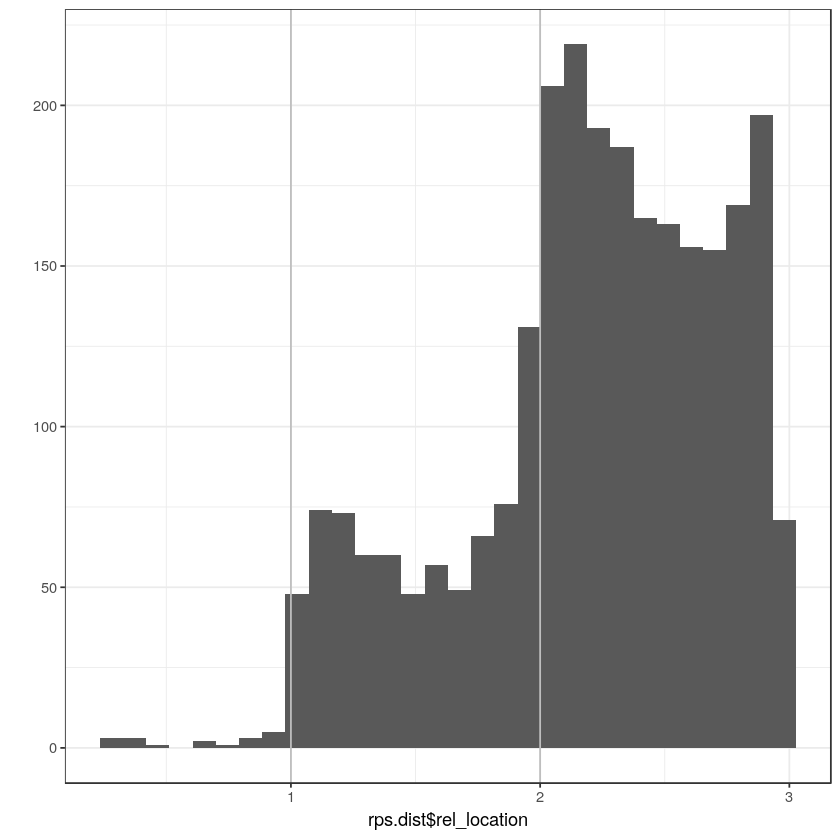

In [7]:
qplot(rps.dist$rel_location, geom="histogram") + geom_vline(xintercept = 1:2, col = "grey") + theme_bw()

In [8]:
summary(data.frame(rps.dist$utr5_size, rps.dist$cds_size, rps.dist$utr3_size))

 rps.dist.utr5_size rps.dist.cds_size rps.dist.utr3_size
 Min.   :   5       Min.   :  209     Min.   :  18      
 1st Qu.:  98       1st Qu.:  743     1st Qu.: 575      
 Median : 187       Median : 1361     Median :1208      
 Mean   : 207       Mean   : 2043     Mean   :1709      
 3rd Qu.: 296       3rd Qu.: 2888     3rd Qu.:2727      
 Max.   :1042       Max.   :15551     Max.   :8239      

In [9]:
rps.utr5.SF <- median(rps.dist$utr5_size, na.rm = T)/median(rps.dist$cds_size, na.rm = T)
rps.utr3.SF <- median(rps.dist$utr3_size, na.rm = T)/median(rps.dist$cds_size, na.rm = T)

In [10]:
# assign the regions to new dataframes
rps.utr5.dist <- rps.dist[rps.dist$rel_location < 1, ]
rps.cds.dist <- rps.dist [rps.dist$rel_location < 2 & rps.dist$rel_location >= 1, ]
rps.utr3.dist <- rps.dist[rps.dist$rel_location >= 2, ]

In [11]:
rps.utr5.dist$rel_location <- rescale(rps.utr5.dist$rel_location, to = c(1-rps.utr5.SF, 1), from = c(0,1))
rps.utr3.dist$rel_location <- rescale(rps.utr3.dist$rel_location, to = c(2, 2+rps.utr3.SF), from = c(2,3))

In [12]:
# Combine and plot
## Histogram
rps.metagene.coord <- c(rps.utr5.dist$rel_location, rps.cds.dist$rel_location, rps.utr3.dist$rel_location)
p <- qplot(rps.metagene.coord, geom="histogram") + geom_vline(xintercept = 1:2, col = "grey") + theme_bw()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


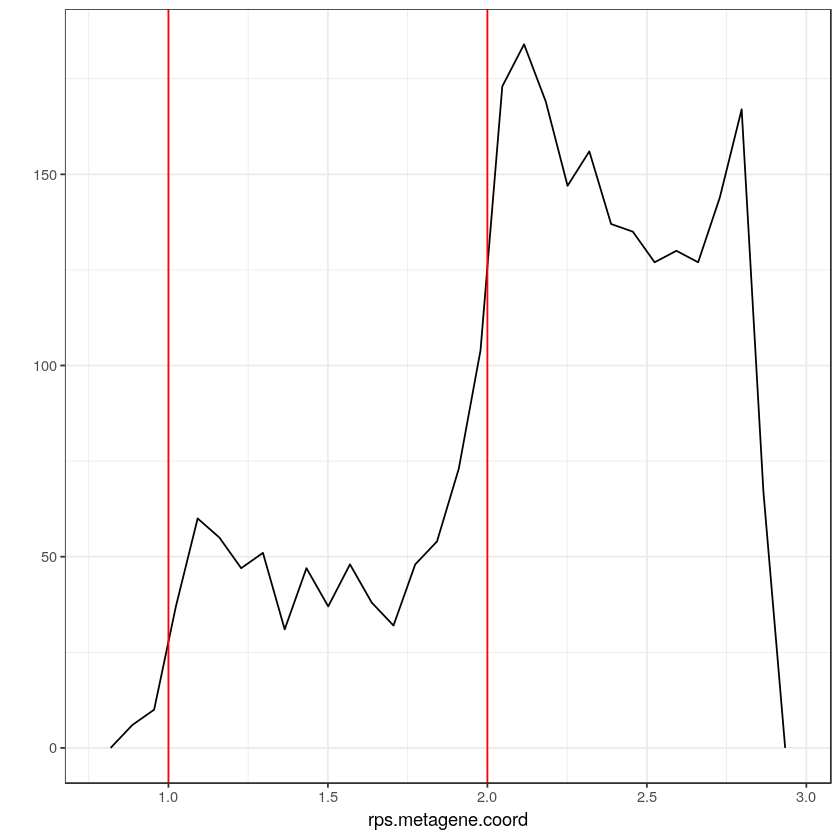

In [13]:
qplot(rps.metagene.coord, geom="freqpoly") + geom_vline(xintercept = 1:2, col = "red") + theme_bw()

# Read in and plot Apo-1000

In [14]:
apo.dist <- read.delim (apobec_dist_measures, header = T)
dim(apo.dist)

[1] 28 14

In [15]:
head(apo.dist)

chr,coord,gene_name,refseqID,rel_location,utr5_st,utr5_end,cds_st,cds_end,utr3_st,utr3_end,utr5_size,cds_size,utr3_size
chr1,19401296,UBR4,ENST00000375254.3,2.0920245,15609,15582,15581,30,29,-296,27,15551,325
chr1,173827172,DARS2,ENST00000361951.4,2.3912010,2993,2267,2266,329,328,-512,726,1937,840
chr1,182992635,LAMC1,ENST00000258341.4,0.1595331,40,-216,-217,-5046,-5047,-7848,256,4829,2801
chr1,226548588,PARP1,ENST00000366794.5,2.7451235,3761,3618,3617,573,572,-196,143,3044,768
chr1,226548678,PARP1,ENST00000366794.5,2.6280884,3671,3528,3527,483,482,-286,143,3044,768
chr1,226548911,PARP1,ENST00000366794.5,2.3250975,3438,3295,3294,250,249,-519,143,3044,768


In [16]:
# Determine longest length transcript for each gene
trx_len <- apo.dist$utr5_size + apo.dist$cds_size + apo.dist$utr3_size # Determine transcript length
temp <- data.frame(apo.dist$gene_name, apo.dist$refseqID, trx_len)
colnames(temp) <- c("gene_name", "gid", "trx_len") 
temp <- temp[order(temp$gene_name, -temp$trx_len),]
temp
temp <- temp[!duplicated(temp$gene_name),]
temp

# limit m6a data to one transcript per gene (longest)
apo.dist <- apo.dist[apo.dist$refseqID %in% temp$gid,]

# View size of our dataset (rows, columns)
dim(apo.dist)

,gene_name,gid,trx_len
19,ACLY,ENST00000590151.1,4306
21,ALYREF,ENST00000505490.2,1085
2,DARS2,ENST00000361951.4,3503
22,DSG2,ENST00000261590.8,5828
17,DYNC1H1,ENST00000360184.4,14330
12,GCN1L1,ENST00000300648.6,8672
20,KPNB1,ENST00000290158.4,6136
3,LAMC1,ENST00000258341.4,7886
23,LRPPRC,ENST00000260665.7,6332
28,MCM4,ENST00000523944.1,4102


,gene_name,gid,trx_len
19,ACLY,ENST00000590151.1,4306
21,ALYREF,ENST00000505490.2,1085
2,DARS2,ENST00000361951.4,3503
22,DSG2,ENST00000261590.8,5828
17,DYNC1H1,ENST00000360184.4,14330
12,GCN1L1,ENST00000300648.6,8672
20,KPNB1,ENST00000290158.4,6136
3,LAMC1,ENST00000258341.4,7886
23,LRPPRC,ENST00000260665.7,6332
28,MCM4,ENST00000523944.1,4102


[1] 28 14

In [17]:
x = temp[order(temp$gene_name, -temp$trx_len),]
x[x$gene_name %in% 'HES4',]

gene_name,gid,trx_len


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


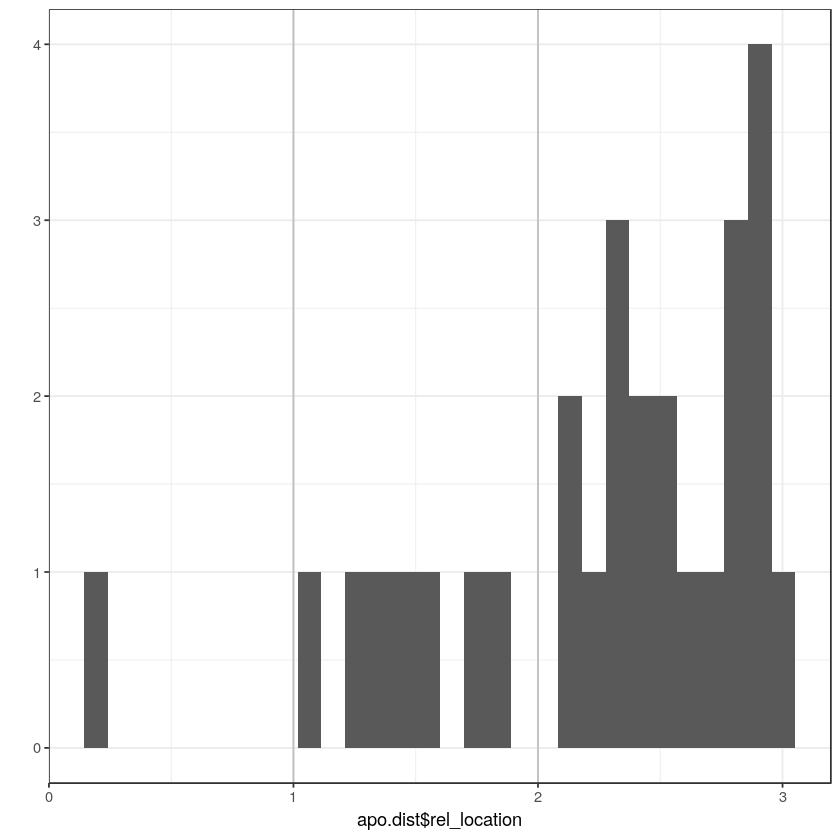

In [18]:
qplot(apo.dist$rel_location, geom="histogram") + geom_vline(xintercept = 1:2, col = "grey") + theme_bw()

In [19]:
summary(data.frame(apo.dist$utr5_size, apo.dist$cds_size, apo.dist$utr3_size))

 apo.dist.utr5_size apo.dist.cds_size apo.dist.utr3_size
 Min.   :  5.00     Min.   :  437     Min.   :  65.0    
 1st Qu.: 56.75     1st Qu.: 1756     1st Qu.: 709.5    
 Median :150.50     Median : 2610     Median : 866.0    
 Mean   :208.96     Mean   : 4085     Mean   :1410.0    
 3rd Qu.:268.25     3rd Qu.: 4287     3rd Qu.:2134.2    
 Max.   :726.00     Max.   :15551     Max.   :5069.0    

In [20]:
apo.utr5.SF <- median(apo.dist$utr5_size, na.rm = T)/median(apo.dist$cds_size, na.rm = T)
apo.utr3.SF <- median(apo.dist$utr3_size, na.rm = T)/median(apo.dist$cds_size, na.rm = T)

# assign the regions to new dataframes
apo.utr5.dist <- apo.dist[apo.dist$rel_location < 1, ]
apo.cds.dist <- apo.dist [apo.dist$rel_location < 2 & apo.dist$rel_location >= 1, ]
apo.utr3.dist <- apo.dist[apo.dist$rel_location >= 2, ]

apo.utr5.dist$rel_location <- rescale(apo.utr5.dist$rel_location, to = c(1-apo.utr5.SF, 1), from = c(0,1))
apo.utr3.dist$rel_location <- rescale(apo.utr3.dist$rel_location, to = c(2, 2+apo.utr3.SF), from = c(2,3))

In [21]:
# Combine and plot
## Histogram
apo.metagene.coord <- c(apo.utr5.dist$rel_location, apo.cds.dist$rel_location, apo.utr3.dist$rel_location)
p <- qplot(apo.metagene.coord, geom="histogram") + geom_vline(xintercept = 1:2, col = "grey") + theme_bw()

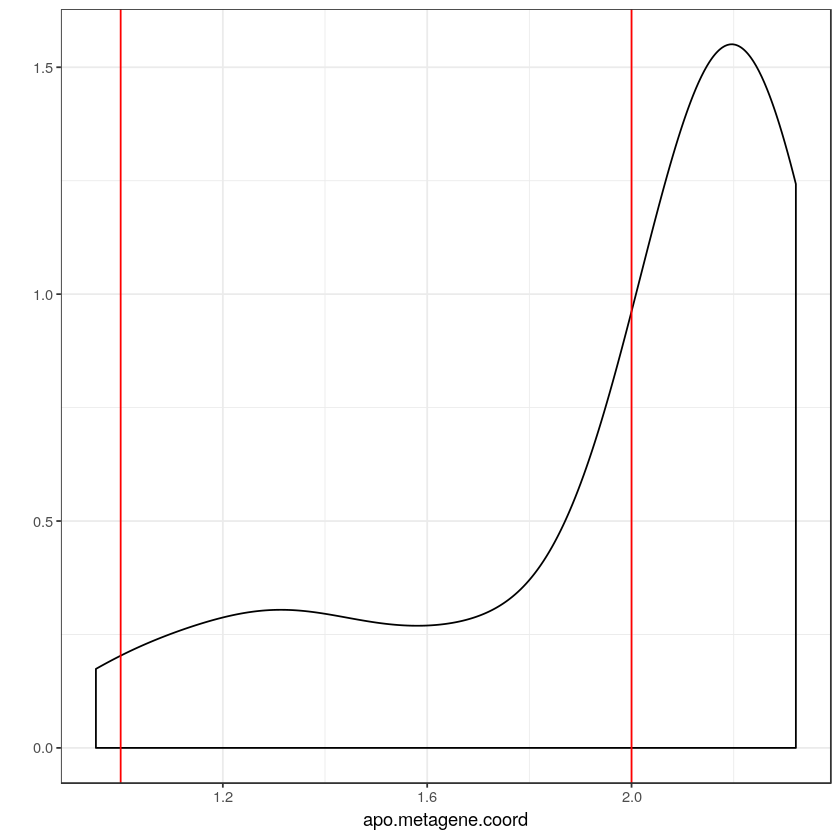

In [22]:
# qplot(apo.metagene.coord, geom="freqpoly") + geom_vline(xintercept = 1:2, col = "red") + theme_bw()
qplot(apo.metagene.coord, geom="density") + geom_vline(xintercept = 1:2, col = "red") + theme_bw()


# Read in and plot RBFOX2-1000

In [23]:
rbfox2.dist <- read.delim (rbfox2_dist_measures, header = T)
dim(rbfox2.dist)

[1] 2366   14

In [24]:
head(rbfox2.dist)

chr,coord,gene_name,refseqID,rel_location,utr5_st,utr5_end,cds_st,cds_end,utr3_st,utr3_end,utr5_size,cds_size,utr3_size
chr1,17734013,RCC2,ENST00000375436.4,2.675107,3329,3142,3141,1573,1572,-757,187,1568,2329
chr1,17734185,RCC2,ENST00000375436.4,2.601288,3157,2970,2969,1401,1400,-929,187,1568,2329
chr1,17734912,RCC2,ENST00000375436.4,2.289270,2430,2243,2242,674,673,-1656,187,1568,2329
chr1,17735244,RCC2,ENST00000375436.4,2.146781,2098,1911,1910,342,341,-1988,187,1568,2329
chr1,19401296,UBR4,ENST00000375254.3,2.092025,15609,15582,15581,30,29,-296,27,15551,325
chr1,28608149,SESN2,ENST00000253063.3,2.494967,2599,2279,2278,836,835,-853,320,1442,1688


In [25]:
# Determine longest length transcript for each gene
trx_len <- rbfox2.dist$utr5_size + rbfox2.dist$cds_size + rbfox2.dist$utr3_size # Determine transcript length
temp <- data.frame(rbfox2.dist$gene_name, rbfox2.dist$refseqID, trx_len)
colnames(temp) <- c("gene_name", "gid", "trx_len") 
temp <- temp[order(temp$gene_name, -temp$trx_len),]
temp
temp <- temp[!duplicated(temp$gene_name),]
temp

# limit m6a data to one transcript per gene (longest)
rbfox2.dist <- rbfox2.dist[rbfox2.dist$refseqID %in% temp$gid,]

# View size of our dataset (rows, columns)
dim(rbfox2.dist)

,gene_name,gid,trx_len
1215,ACLY,ENST00000590151.1,4306
1216,ACLY,ENST00000590151.1,4306
1217,ACLY,ENST00000590151.1,4306
1218,ACLY,ENST00000590151.1,4306
1219,ACLY,ENST00000590151.1,4306
1220,ACLY,ENST00000590151.1,4306
1221,ACLY,ENST00000590151.1,4306
1222,ACLY,ENST00000590151.1,4306
1223,ACLY,ENST00000590151.1,4306
1224,ACLY,ENST00000590151.1,4306


,gene_name,gid,trx_len
1215,ACLY,ENST00000590151.1,4306
1811,ACTB,ENST00000331789.5,1914
1245,ACTG1,ENST00000331925.2,1991
1260,ALYREF,ENST00000505490.2,1085
154,ATP1A1,ENST00000295598.5,3651
871,ATP5B,ENST00000262030.3,1786
829,B3GNT1,ENST00000311181.4,2069
1163,C1QBP,ENST00000225698.4,1166
1332,CALR,ENST00000316448.5,1900
1428,CCT4,ENST00000394440.3,2517


[1] 2366   14

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


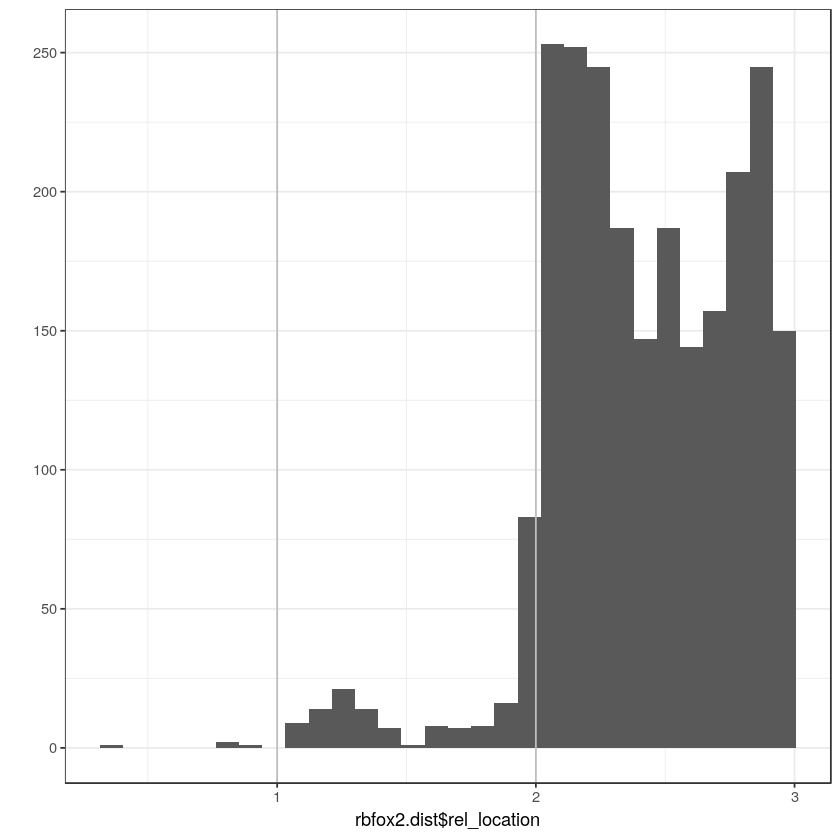

In [26]:
qplot(rbfox2.dist$rel_location, geom="histogram") + geom_vline(xintercept = 1:2, col = "grey") + theme_bw()

In [27]:
summary(data.frame(rbfox2.dist$utr5_size, rbfox2.dist$cds_size, rbfox2.dist$utr3_size))

 rbfox2.dist.utr5_size rbfox2.dist.cds_size rbfox2.dist.utr3_size
 Min.   :   5.0        Min.   :   74        Min.   :  18.0       
 1st Qu.:  98.0        1st Qu.:  770        1st Qu.: 783.2       
 Median : 166.0        Median : 1334        Median :1247.0       
 Mean   : 194.3        Mean   : 2142        Mean   :1728.6       
 3rd Qu.: 232.0        3rd Qu.: 3071        3rd Qu.:2518.0       
 Max.   :1042.0        Max.   :15551        Max.   :8239.0       

In [28]:
rbfox2.utr5.SF <- median(rbfox2.dist$utr5_size, na.rm = T)/median(rbfox2.dist$cds_size, na.rm = T)
rbfox2.utr3.SF <- median(rbfox2.dist$utr3_size, na.rm = T)/median(rbfox2.dist$cds_size, na.rm = T)

# assign the regions to new dataframes
rbfox2.utr5.dist <- rbfox2.dist[rbfox2.dist$rel_location < 1, ]
rbfox2.cds.dist <- rbfox2.dist [rbfox2.dist$rel_location < 2 & rbfox2.dist$rel_location >= 1, ]
rbfox2.utr3.dist <- rbfox2.dist[rbfox2.dist$rel_location >= 2, ]

rbfox2.utr5.dist$rel_location <- rescale(rbfox2.utr5.dist$rel_location, to = c(1-rbfox2.utr5.SF, 1), from = c(0,1))
rbfox2.utr3.dist$rel_location <- rescale(rbfox2.utr3.dist$rel_location, to = c(2, 2+rbfox2.utr3.SF), from = c(2,3))

In [29]:
# Combine and plot
## Histogram
rbfox2.metagene.coord <- c(rbfox2.utr5.dist$rel_location, rbfox2.cds.dist$rel_location, rbfox2.utr3.dist$rel_location)
p <- qplot(rbfox2.metagene.coord, geom="histogram") + geom_vline(xintercept = 1:2, col = "grey") + theme_bw()

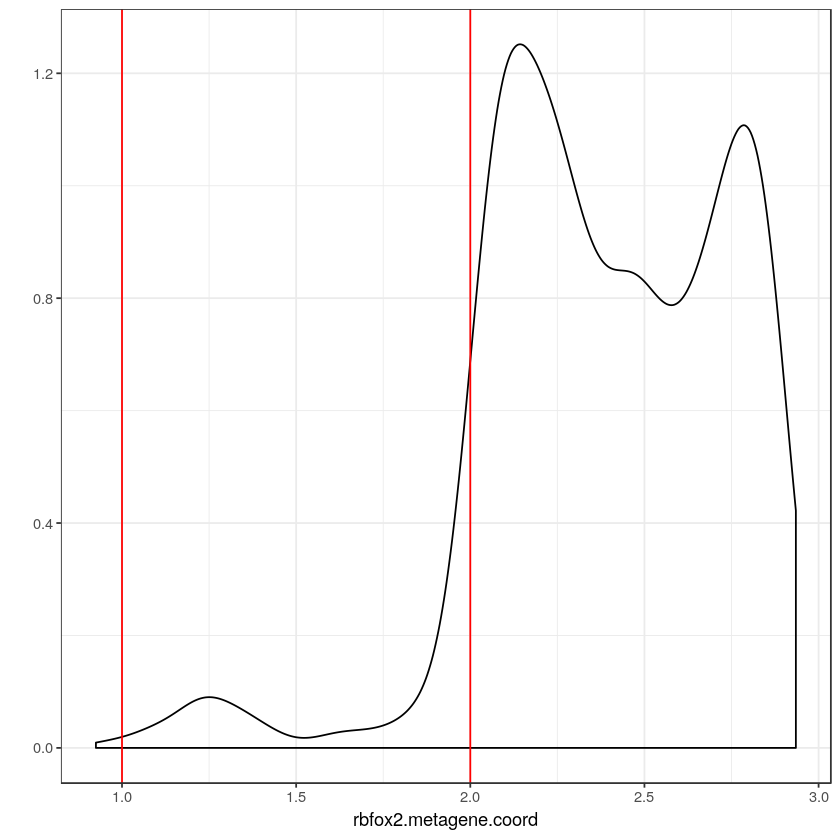

In [30]:
# qplot(rbfox2.metagene.coord, geom="freqpoly") + geom_vline(xintercept = 1:2, col = "red") + theme_bw()
qplot(rbfox2.metagene.coord, geom="density") + geom_vline(xintercept = 1:2, col = "red") + theme_bw()

# Compare the three

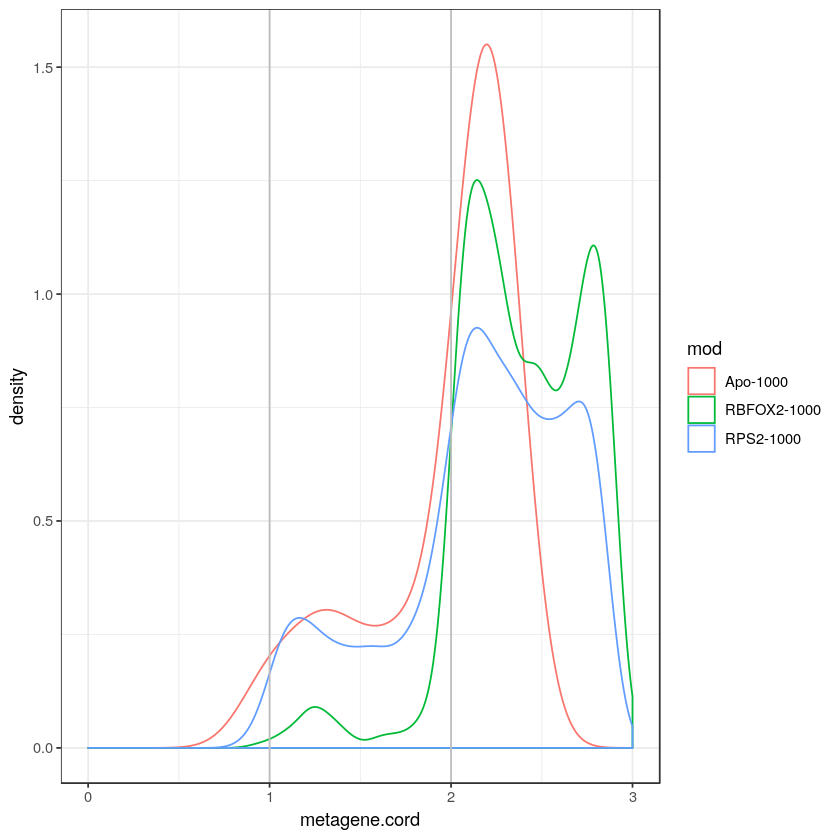

In [31]:
metagene.cord <- c(rps.metagene.coord, apo.metagene.coord, rbfox2.metagene.coord)
mod <- c(rep("RPS2-1000", length(rps.metagene.coord)), 
         rep("Apo-1000", length(apo.metagene.coord)),
         rep("RBFOX2-1000", length(rbfox2.metagene.coord))
        ) 
df <- data.frame(metagene.cord, mod)
ggplot(df) + geom_density(aes(x = metagene.cord, colour = mod)) + xlim(0, 3) + 
  theme_bw() + geom_vline(xintercept = 1:2, col = "grey")

In [32]:
metagene.cord <- c(rps.metagene.coord, apo.metagene.coord, rbfox2.metagene.coord)
mod <- c(rep("RPS2-1000", length(rps.metagene.coord)), 
         rep("Apo-1000", length(apo.metagene.coord)),
         rep("RBFOX2-1000", length(rbfox2.metagene.coord))
        ) 
df <- data.frame(metagene.cord, mod)
png('RPS2-vs-Apo-top200exprs.png')
ggplot(df) + geom_density(aes(x = metagene.cord, colour = mod)) + xlim(0, 3) + 
  theme_bw() + geom_vline(xintercept = 1:2, col = "grey")
dev.off()

png 
  2

In [33]:
dim(df)

[1] 5035    2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


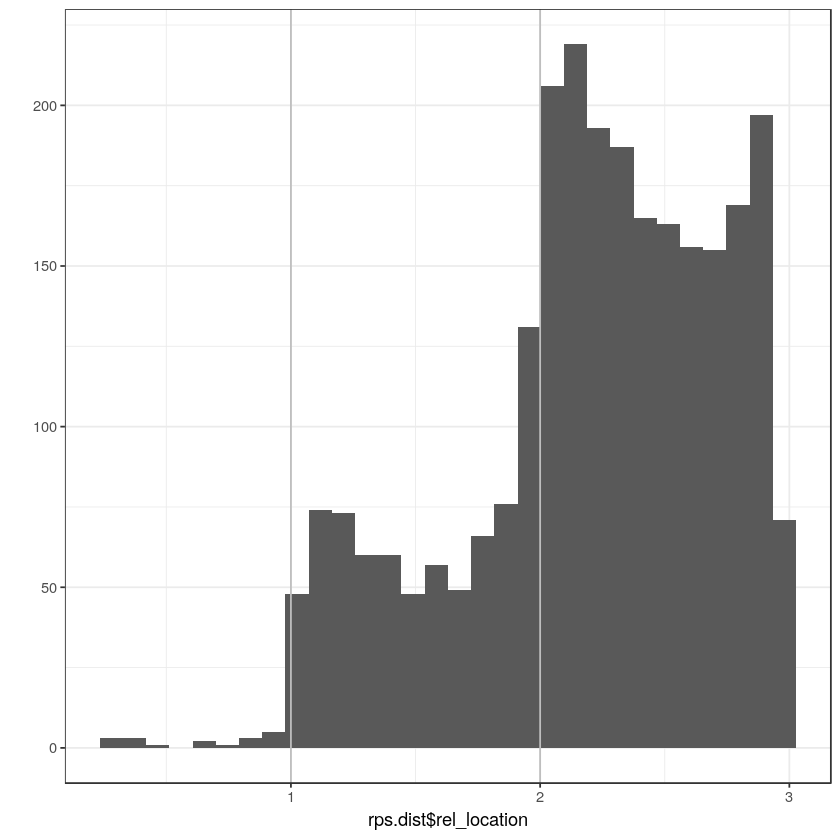

In [34]:
qplot(rps.dist$rel_location, geom="histogram") + geom_vline(xintercept = 1:2, col = "grey") + theme_bw()

In [35]:
write.table(rps.metagene.coord, 'rps.metagene.coord.txt')

In [36]:
write.table(apo.metagene.coord, 'apo.metagene.coord.txt')

In [37]:
write.table(rps.dist$rel_location, 'rps.dist.rel_location.txt')

In [38]:
write.table(apo.dist$rel_location, 'apo.dist.rel_location.txt')

In [39]:
write.table(rbfox2.dist$rel_location, 'rbfox2.dist.rel_location.txt')